# <p style="text-align: center;"> Trabalho Prático 01</p>

### <p style="text-align: center;"> Alunos: <br> Ana Luisa Rodrigues - 2014137530 <br> Matheus Vargas - 2014144812


### Objetivo

O objetivo deste trabalho prático é a implementação do Chroma Key, uma sobreposição de imagens com fundo verde sobre um fundo arbitrário, com a utilização do notebook Jupyter e a linguagem Python. </p>

Inicialmente selecionamos 4 imagens com fundo verde ('dilma.jpg', 'dog.jpg', 'mario.jpg', 'minion.jpg') e uma imagem para servir como fundo para a composição ('fundo.jpg'). As imagens de fundo verde foram escolhidas aleatoriamente enquanto a imagem de fundo foi escolhida com o propósito de ciar um "jogo" de encontrar as imagens no fundo do desenho animado "Onde está Wally?". O projeto será dividido em 4 partes: aplicação do Chroma Key nas imagens de fundo verde; aplicação de operações sobre as imagens já com o fundo removido; combinação de todas as imagens no fundo e formação de uma única imagem; e exibição da imagem resultante.

### Importação e definições de funções

In [ ]:
import skimage
import skimage.io as io
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import matplotlib.pyplot as plt
from skimage.morphology import erosion
import matplotlib.pyplot as plt

import numpy as np

from scipy import ndimage

import warnings
warnings.filterwarnings('ignore')

def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

### Parte I - Aplicação do Chroma Key 

### Parte II - Aplicação de operações sobre as imagens

In [ ]:
img_dilma = io.imread('dilma.jpg')

show(img_dilma)

Ao se carregar a imagem da Dilma, pode-se perceber que ela possui marcas de expressão e que a qualidade da imagem não está muito boa. Para melhorar esses dois fatores, será aplicado o filtro Gaussiano para suavização. 

In [ ]:
smooth_image = filters.gaussian(img_dilma, 1.5)
show(smooth_image)

In [ ]:
img_dog = io.imread('dog.jpg')

show(img_dog)

A imagem do cachorro será rotacionada horizontalmente e depois em 30 graus e será aplicado o filtro de realce, já que a imagem está muito suavizada.

In [ ]:
rotate_hor_dog = np.fliplr(img_dog)
show(rotate_hor_dog)

In [ ]:
rotate_30_dog = ndimage.rotate(rotated_dog, 30, reshape=False)
show(rotate_30_dog)

In [ ]:
# As definições para mostrar a imagem de fundo devem 
#ser alteradas uma vez que este deve ser maior que as demais imagens.
def show_bg(img):
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

img_bg = io.imread('images/fundo.jpg')
show_bg(img_bg)

In [172]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

###### Funções utilizadas #########


# Redimensiona a imagem passada como paramentro
# de acordo com o tamanho base
def resize_img(img, basewidth):
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    return img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    
    
# Plota a imagem passada como parametro
def show_img(img):
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    
# Remove o fundo da imagem para adicionar na imagem de fundo
# Parâmentros:
# img - Imagem com fundo verde
# img_bg - Background
# offset - Posição da imagem no BG
def remove_background(img, img_bg, offset):
    x_offset, y_offset = offset
    rgb_img = img.convert('RGB')
    rgb_bgimg = img_bg.convert('RGB')
    img_w, img_h = img.size
    for row in range(0, img_h):
        for col in range(0, img_w):
            r, g, b = rgb_img.getpixel((col, row))
            if (g >= 200):
                r_tochange, g_tochange, b_tochange = rgb_bgimg.getpixel((col + x_offset, row + y_offset))
                img.putpixel((col, row), (r_tochange, g_tochange, b_tochange))
    return img
    

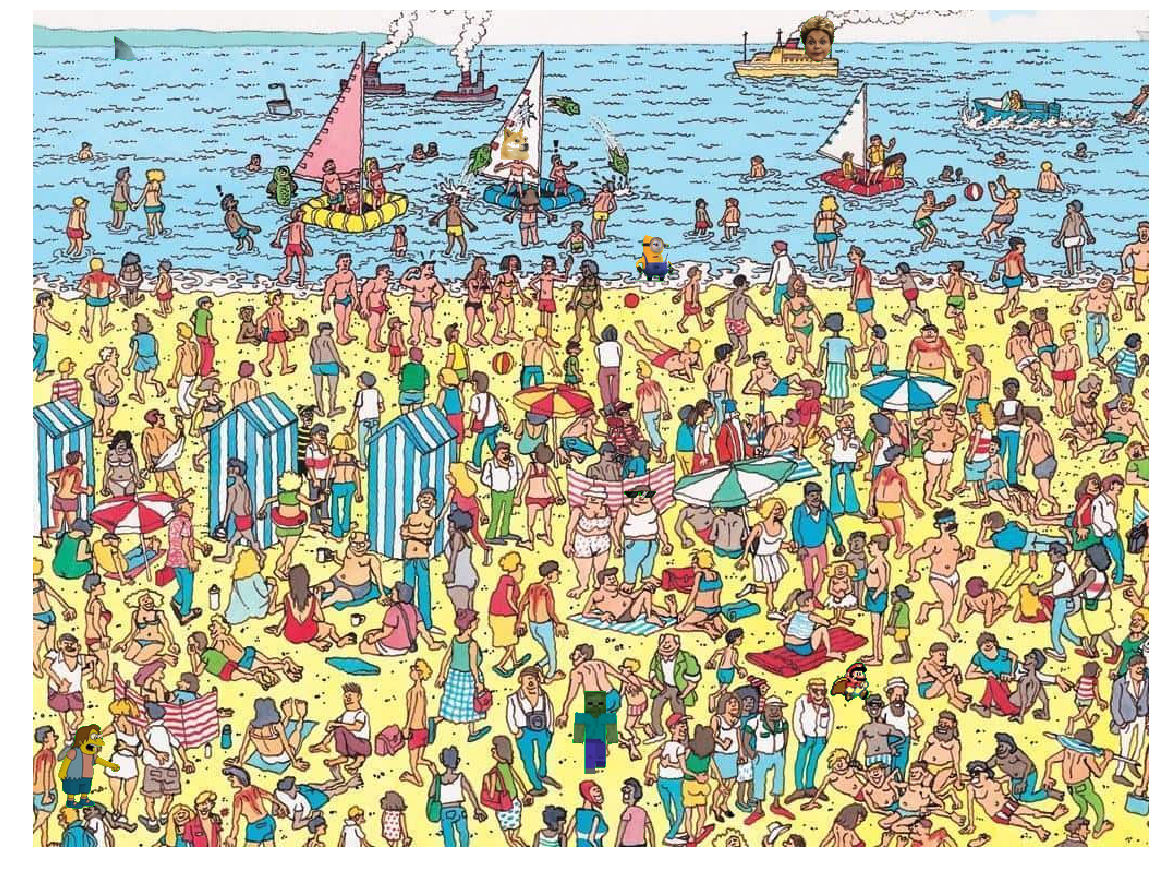

In [256]:
#Carrega as imagens necessárias
img_bg = Image.open('images/fundo.jpg')
img_dog = Image.open('images/dog.jpg')
img_dilma = Image.open('images/dilma.jpg')
img_minecraft = Image.open('images/minecraft.jpg')
img_simpson = Image.open('images/simpson.jpg')
img_glasses = Image.open('images/glasses.jpg')
img_mario = Image.open('images/mario.jpg')
img_minion = Image.open('images/minion.jpg')
img_shark = Image.open('images/shark.jpg')


#Armazena os parametros do Background
img_bg_w, img_bg_h = img_bg.size

#Redefine o tamanho da imagem
imgdog_resized = resize_img(img_dog, 85)
imgdilma_resized = resize_img(img_dilma,100)
imgminecraft_resized = resize_img(img_minecraft,280)
imgsimpson_resized = resize_img(img_simpson, 185)
imgglasses_resized = resize_img(img_glasses,40)
imgmario_resized = resize_img(img_mario, 185)
imgminion_resized = resize_img(img_minion, 185)
imgshark_resized = resize_img(img_shark, 185)

#Define a posição da imagem no BG
dog_offset = (400, 100)
dilma_offset = (670, 0)
minecraft_offset= (375,590)
simpson_offset = (0,630)
glasses_offset = (537,434)
mario_offset = (665,540)
minion_offset = (520,170)
shark_offset = (0,0)

#Retira o fundo das imagens
imgdog_processed = remove_background(imgdog_resized, img_bg, dog_offset)
imgdilma_processed = remove_background(imgdilma_resized, img_bg, dilma_offset)
imgminecraft_processed = remove_background(imgminecraft_resized, img_bg, minecraft_offset)
imgsimpson_processed = remove_background(imgsimpson_resized, img_bg, simpson_offset)
imgglasses_processed = remove_background(imgglasses_resized, img_bg, glasses_offset)
imgmario_processed = remove_background(imgmario_resized, img_bg, mario_offset)
imgminion_processed = remove_background(imgminion_resized, img_bg, minion_offset)
imgshark_processed = remove_background(imgshark_resized, img_bg, shark_offset)

#Adiciona a imagem no BG
img_bg.paste(imgdog_processed, dog_offset)
img_bg.paste(imgdilma_processed, dilma_offset)
img_bg.paste(imgminecraft_processed, minecraft_offset)
img_bg.paste(imgsimpson_processed, simpson_offset)
img_bg.paste(imgglasses_processed, glasses_offset)
img_bg.paste(imgmario_processed, mario_offset)
img_bg.paste(imgminion_processed, minion_offset)
img_bg.paste(imgshark_processed, shark_offset)

# Plota a imagem
show_img(img_bg)